In [1]:
import utils, models_preprocessing, metrics
import numpy as np
import matplotlib.pyplot as plt
import itertools
import os
import PIL.Image
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import pandas as pd
from scipy import stats, integrate
import seaborn as sns
sns.set(color_codes=True)
np.random.seed(sum(map(ord, "distributions")))

from keras import models
from keras.models import save_model, load_model
from keras.preprocessing import image
from quiver_engine import server

Using TensorFlow backend.
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
csv_file = pd.read_csv('classifications.csv', low_memory=False)

In [3]:
csv_file.head()

,ID,is_lens,Einstein_area,numb_pix_lensed_image,flux_lensed_image_in_sigma
0,100000,1,6.040000e-10,804,3714.6800
1,100001,0,4.700000e-11,0,0.0000
2,100002,1,7.180000e-11,51,57.6093
3,100003,1,1.760000e-11,347,18815.4000
4,100004,0,2.030000e-09,0,0.0000


In [4]:
data = np.load('data/imadjust.npy')
labels = np.load('labels/classification.npy')

In [5]:
model_function = models_preprocessing.compiledConvnet
auroc = metrics.auroc
accuracy = metrics.accuracy
text = metrics.basicTextMetrics

In [6]:
%matplotlib inline

In [7]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(data, labels, test_size=0.2, shuffle=False)

In [9]:
model = utils.train(model_function(), 20, Xtrain, Ytrain)

Epoch 1/20
16000/16000 [==============================] - 114s 7ms/step - loss: 0.5491 - acc: 0.7305
Epoch 2/20
16000/16000 [==============================] - 114s 7ms/step - loss: 0.4349 - acc: 0.8041
Epoch 3/20
16000/16000 [==============================] - 113s 7ms/step - loss: 0.3777 - acc: 0.8367
Epoch 4/20
16000/16000 [==============================] - 113s 7ms/step - loss: 0.3351 - acc: 0.8559
Epoch 5/20
16000/16000 [==============================] - 113s 7ms/step - loss: 0.3025 - acc: 0.8734
Epoch 6/20
16000/16000 [==============================] - 113s 7ms/step - loss: 0.2738 - acc: 0.8870
Epoch 7/20
16000/16000 [==============================] - 113s 7ms/step - loss: 0.2454 - acc: 0.8988
Epoch 8/20
16000/16000 [==============================] - 113s 7ms/step - loss: 0.2200 - acc: 0.9139
Epoch 9/20
16000/16000 [==============================] - 114s 7ms/step - loss: 0.1993 - acc: 0.9208
Epoch 10/20
16000/16000 [==============================] - 113s 7ms/step - loss: 0.1784 - a

In [8]:
os.makedirs('models', exist_ok=True)
PATH = 'models/'

In [11]:
save_model(model, f'{PATH}model_cConv.hdf5')

In [9]:
model = load_model(f'{PATH}model_cConv.hdf5')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 50, 50, 64)        2368      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        18464     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 16)        4624      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 16)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1936)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               247936    
_________________________________________________________________
dense_2 (Dense)              (None, 32)                4128      
__________

In [10]:
preds_test = model.predict_classes(Xtest)
probs_test = model.predict(Xtest)

In [11]:
preds_data = model.predict_classes(data)
probs_data = model.predict(data)

In [12]:
model.evaluate(Xtest, Ytest)

4000/4000 [==============================] - 13s 3ms/step


[0.55888201680779459, 0.85050000000000003]

In [13]:
preds_test

array([[1],
       [0],
       [0],
       ..., 
       [0],
       [0],
       [0]], dtype=int32)

In [14]:
csv_file.head()

,ID,is_lens,Einstein_area,numb_pix_lensed_image,flux_lensed_image_in_sigma
0,100000,1,6.040000e-10,804,3714.6800
1,100001,0,4.700000e-11,0,0.0000
2,100002,1,7.180000e-11,51,57.6093
3,100003,1,1.760000e-11,347,18815.4000
4,100004,0,2.030000e-09,0,0.0000


In [15]:
csv_test = pd.read_csv('classifications.csv', skiprows=range(1, 16001))

In [16]:
csv_test.insert(2, 'is_lens_preds', preds_test)

In [17]:
csv_test.head()

,ID,is_lens,is_lens_preds,Einstein_area,numb_pix_lensed_image,flux_lensed_image_in_sigma
0,116000,0,1,1.720000e-09,0,0.000
1,116001,1,0,8.610000e-12,69,132.736
2,116002,0,0,1.390000e-10,0,0.000
3,116003,1,1,7.060000e-12,120,227.222
4,116004,1,1,1.890000e-09,104,278.564


In [69]:
Einstein_radius = np.sqrt(csv_test.Einstein_area / (np.pi))

In [70]:
csv_test['Einstein_radius'] = Einstein_radius

In [71]:
csv_test.head()

,ID,is_lens,is_lens_preds,probs,Einstein_area,numb_pix_lensed_image,flux_lensed_image_in_sigma,Einstein_radius
0,116000,0,1,0.999989,1.720000e-09,0,0.000,0.000023
1,116001,1,0,0.101402,8.610000e-12,69,132.736,0.000002
2,116002,0,0,0.000594,1.390000e-10,0,0.000,0.000007
3,116003,1,1,0.999986,7.060000e-12,120,227.222,0.000001
4,116004,1,1,0.999812,1.890000e-09,104,278.564,0.000025


In [21]:
csv_test.insert(3, 'probs', probs_test)

In [22]:
csv_test.head()

,ID,is_lens,is_lens_preds,probs,Einstein_area,numb_pix_lensed_image,flux_lensed_image_in_sigma,Einstein_radius
0,116000,0,1,0.999989,1.720000e-09,0,0.000,0.000017
1,116001,1,0,0.101402,8.610000e-12,69,132.736,0.000001
2,116002,0,0,0.000594,1.390000e-10,0,0.000,0.000005
3,116003,1,1,0.999986,7.060000e-12,120,227.222,0.000001
4,116004,1,1,0.999812,1.890000e-09,104,278.564,0.000017


In [72]:
negatives = csv_test[csv_test.is_lens == 0]; positives = csv_test[csv_test.is_lens == 1]

In [73]:
fn = positives[positives.is_lens_preds == 0]; fp = negatives[negatives.is_lens_preds == 1]

In [74]:
tn = negatives[negatives.is_lens_preds == 0]; tp = positives[positives.is_lens_preds == 1]

In [75]:
fn.head()

,ID,is_lens,is_lens_preds,probs,Einstein_area,numb_pix_lensed_image,flux_lensed_image_in_sigma,Einstein_radius
1,116001,1,0,0.101402,8.610000e-12,69,132.7360,0.000002
5,116005,1,0,0.194538,1.740000e-09,20,26.3226,0.000024
41,116041,1,0,0.400790,6.530000e-10,62,203.4780,0.000014
43,116043,1,0,0.290606,5.650000e-11,70,135.2580,0.000004
63,116063,1,0,0.237350,1.040000e-10,81,195.1370,0.000006


In [76]:
print(len(tn), len(fp))
print(len(fn), len(tp))

2074 299
299 1328


### Einstein radius Histograms

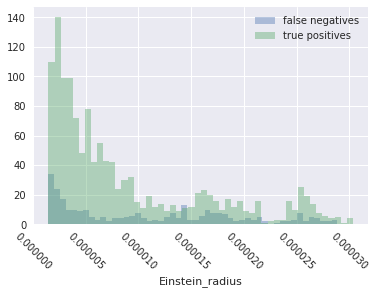

In [96]:
sns.distplot(fn.Einstein_radius, kde=False, bins=50)
sns.distplot(tp.Einstein_radius, kde=False, bins=50)
plt.legend(['false negatives', 'true positives'])
plt.xticks(rotation=-45);

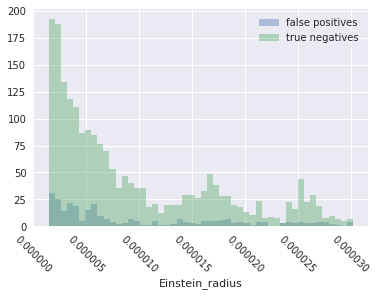

In [97]:
sns.distplot(fp.Einstein_radius, kde=False, bins=50)
sns.distplot(tn.Einstein_radius, kde=False, bins=50)
plt.legend(['false positives', 'true negatives'])
plt.xticks(rotation=-45);

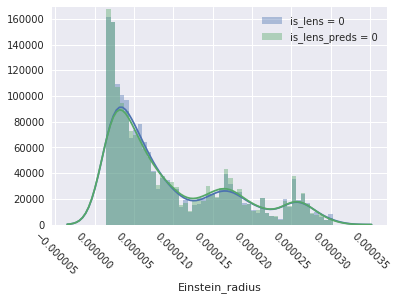

In [149]:
sns.distplot(csv_test.Einstein_radius[csv_test.is_lens==0], kde=True, bins=50)
sns.distplot(csv_test.Einstein_radius[csv_test.is_lens_preds==0], kde=True, bins=50)
plt.legend(['is_lens = 0', 'is_lens_preds = 0'])
plt.xticks(rotation=-45);

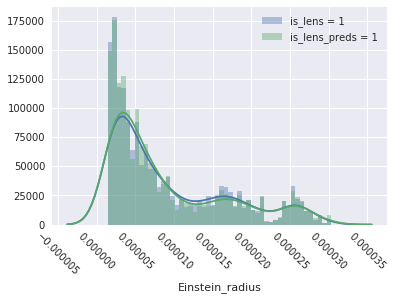

In [148]:
sns.distplot(csv_test.Einstein_radius[csv_test.is_lens==1], kde=True, bins=50)
sns.distplot(csv_test.Einstein_radius[csv_test.is_lens_preds==1], kde=True, bins=50)
plt.legend(['is_lens = 1', 'is_lens_preds = 1'])
plt.xticks(rotation=-45);

### Einstein radius Kernel Density Estimations

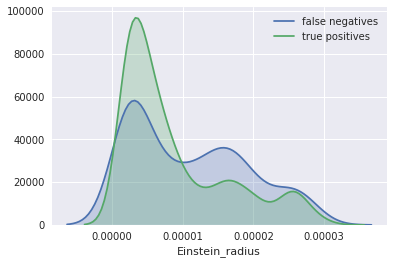

In [94]:
sns.kdeplot(fn.Einstein_radius, shade=True, label="false negatives")
sns.kdeplot(tp.Einstein_radius, shade=True, label="true positives")
plt.xlabel('Einstein_radius')
plt.legend;

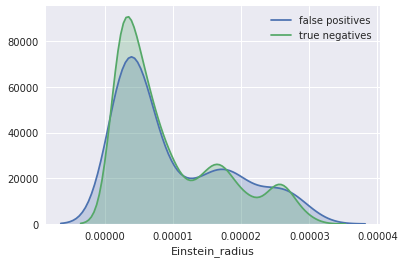

In [93]:
sns.kdeplot(fp.Einstein_radius, shade=True, label="false positives")
sns.kdeplot(tn.Einstein_radius, shade=True, label="true negatives")
plt.xlabel('Einstein_radius')
plt.legend;

### Other Histograms

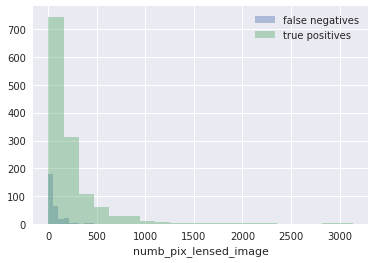

In [85]:
sns.distplot(fn.numb_pix_lensed_image, kde=False, bins=20)
sns.distplot(tp.numb_pix_lensed_image, kde=False, bins=20)
plt.legend(['false negatives', 'true positives']);

### Linear relationships

### Flux of Lensed Image

### Scatter plots

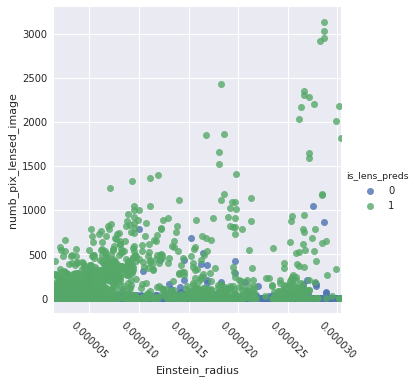

In [91]:
sns.lmplot(x='Einstein_radius', y='numb_pix_lensed_image', data=csv_test, fit_reg=False, hue='is_lens_preds')
plt.xlim([min(csv_test.Einstein_radius), max(csv_test.Einstein_radius)])
plt.xticks(rotation=-45);

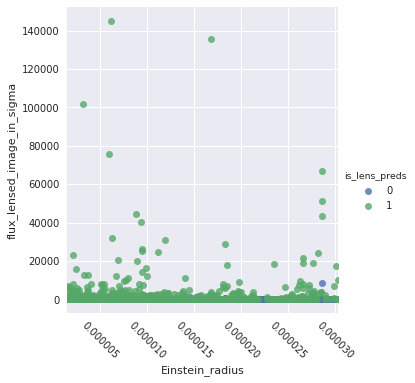

In [92]:
sns.lmplot(x='Einstein_radius', y='flux_lensed_image_in_sigma', data=csv_test, fit_reg=False, hue='is_lens_preds')
plt.xlim([min(csv_test.Einstein_radius), max(csv_test.Einstein_radius)])
plt.xticks(rotation=-45);

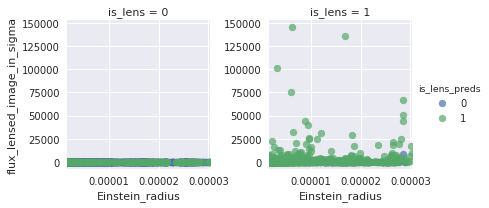

In [105]:
g = sns.FacetGrid(csv_test, col="is_lens", hue="is_lens_preds")
g.map(plt.scatter, 'Einstein_radius', 'flux_lensed_image_in_sigma', alpha=.7)
#g.set_xticklabels(rotation=-45)
plt.xlim([min(csv_test.Einstein_radius), max(csv_test.Einstein_radius)])
g.add_legend();

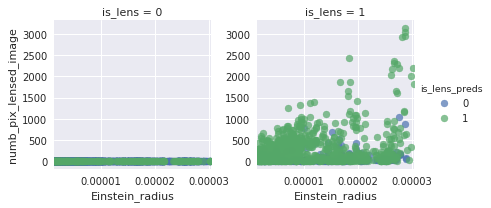

In [106]:
g = sns.FacetGrid(csv_test, col="is_lens", hue="is_lens_preds")
g.map(plt.scatter, 'Einstein_radius', 'numb_pix_lensed_image', alpha=.7)
plt.xlim([min(csv_test.Einstein_radius), max(csv_test.Einstein_radius)])
g.add_legend();

### More plots

#### Scatter

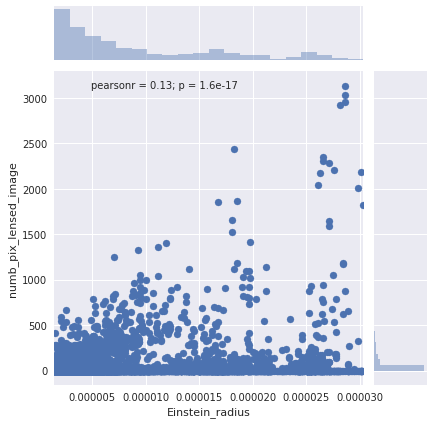

In [130]:
sns.jointplot(x="Einstein_radius", y="numb_pix_lensed_image", data=csv_test, 
              xlim=(min(csv_test.Einstein_radius), max(csv_test.Einstein_radius)));

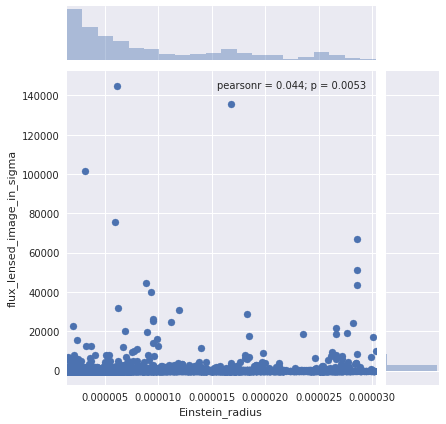

In [129]:
sns.jointplot(x="Einstein_radius", y="flux_lensed_image_in_sigma", data=csv_test,
              xlim=(min(csv_test.Einstein_radius), max(csv_test.Einstein_radius)));

#### Boxplots

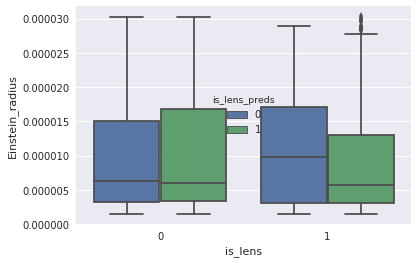

In [151]:
sns.boxplot(x="is_lens", y="Einstein_radius", hue="is_lens_preds", data=csv_test);

#### Stripplot

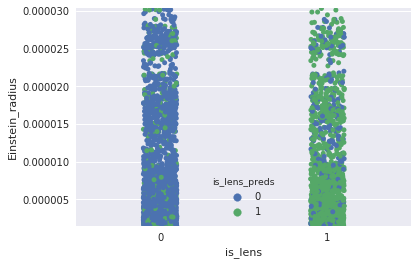

In [163]:
sns.stripplot(x="is_lens", y="Einstein_radius", data=csv_test, jitter=True, hue='is_lens_preds')
plt.ylim([min(csv_test.Einstein_radius), max(csv_test.Einstein_radius)]);